<a href="https://colab.research.google.com/github/Amithashreshta/255/blob/main/255_Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA and Visualization of the data set

In [2]:
pip install plotly

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
import pandas as pd
import numpy as np
import datetime
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly as py
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import HeatMap


In [5]:
df = pd.read_csv('/content/gdrive/My Drive/US_Accidents_June20.csv')


In [6]:
df.tail()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
3513612,A-3513776,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3513613,A-3513777,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3513614,A-3513778,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.0,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3513615,A-3513779,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3513616,A-3513780,Bing,NaN,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.13393,-117.23092,34.13736,-117.23934,0.537,At Highland Ave/Arden Ave - Accident.,NaN,CA-210 W,R,Highland,San Bernardino,CA,92346,US,US/Pacific,KSBD,2019-08-23 20:50:00,79.0,79.0,47.0,28.63,7.0,SW,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

Map quest and Bing are the two different sources that were used to collect the  streaming traffic incident (or event) data. MapQuest and Bing reported severity level but in a different way. There was no 1:1 mapping available between these 2 sources. For our implementation we chose to use the data recorded by mapquest.

In [8]:
df_source = df.groupby('Source').size()
import plotly.express as px
fig = px.bar( x=df_source.index, y=df_source.values, title="Count by Sources" , color = df_source.index)
fig.show()



The traffic accidents were classified into 4 categories based on the severity level with 1 being less severe, 2 being moderate, 3 being severe to 4 being very severe with damage to property and bodily injury. 

In [19]:
severity_x = df.Severity.unique()

In [20]:
severity_y = df.Severity.value_counts().sort_index()

In [21]:
fig = go.Figure(data=[go.Bar(
            x= [1,2,3,4], y=severity_y
        )])
fig.update_layout(
    title_text="Recorded Severity of Accidents")
fig.show()

Features with boolean values and their count. Will need this info during pre-processing to transform them using label encoder. 

In [11]:
bool_cols = [col for col in df.columns if df[col].dtype ==np.dtype('bool')]
booldf = df[bool_cols]
_boolean = booldf.sum(axis=0)

In [22]:
_boolean

Amenity             42082
Bump                  606
Crossing           274526
Give_Way             9564
Junction           284449
No_Exit              4384
Railway             31175
Roundabout            184
Station             70321
Stop                51976
Traffic_Calming      1401
Traffic_Signal     623623
Turning_Loop            0
dtype: int64

The pie chart below shows that most traffic accidents happen at traffic signals, junctions and crossing. 

In [23]:
## slide
fig = px.pie( _boolean, values = _boolean, names = bool_cols ,
             title= "Proximity")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

On an average, a severity 4 accident impacted traffic for 115 mins. 

In [24]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'])

# calculate duration as the difference between end time and start time in minute
df['Duration'] = df.End_Time - df.Start_Time 
df['Duration'] = df['Duration'].apply(lambda x:round(x.total_seconds() / 60) )
print("The overall mean duration is: ", (round(df['Duration'].mean(),3)), 'min')

The overall mean duration is:  115.404 min


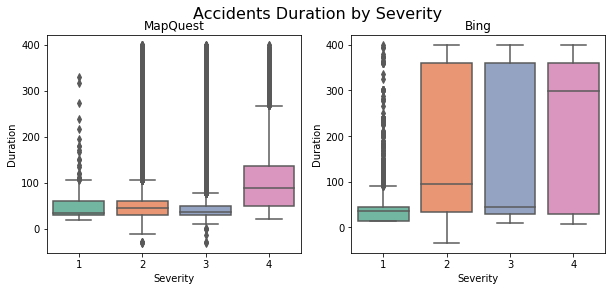

In [25]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
sns.boxplot(x="Severity", y="Duration",
            data=df.loc[(df['Source']=="MapQuest") & (df['Duration']<400),], palette="Set2", ax=axs[0])
axs[0].set_title('MapQuest')
fig.suptitle('Accidents Duration by Severity', fontsize=16)
sns.boxplot(x="Severity", y="Duration",
            data=df.loc[(df['Source']=="Bing") & (df['Duration']<400),], palette="Set2", ax=axs[1])
axs[1].set_title('Bing')
plt.show()

 The plot below shows the impacted distance due to various severity levels of accidents. On an average upto 5miles of traffic was impacted.

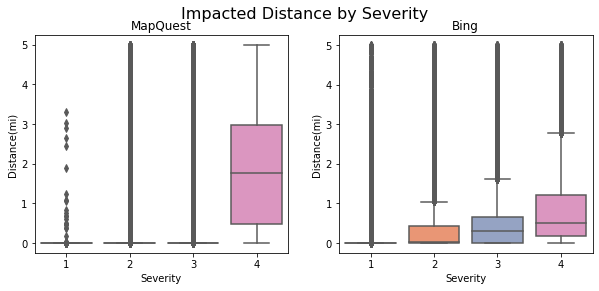

In [26]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
sns.boxplot(x="Severity", y="Distance(mi)", 
            data=df.loc[(df['Source']=="MapQuest") & (df['Distance(mi)']<5),], palette="Set2", ax=axs[0])
axs[0].set_title('MapQuest')
fig.suptitle('Impacted Distance by Severity', fontsize=16)
sns.boxplot(x="Severity", y="Distance(mi)",
            data=df.loc[(df['Source']=="Bing") & (df['Distance(mi)']<5),], palette="Set2", ax=axs[1])
axs[1].set_title('Bing')
plt.show()


In [27]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,314
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,30
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,30
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,30
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,30


In [29]:
df['time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
df = df.set_index('time')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,314
2016-02-08 06:07:59,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,30
2016-02-08 06:49:27,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,30
2016-02-08 07:23:34,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,30
2016-02-08 07:39:07,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,30


In [30]:
df.index

DatetimeIndex(['2016-02-08 05:46:00', '2016-02-08 06:07:59',
               '2016-02-08 06:49:27', '2016-02-08 07:23:34',
               '2016-02-08 07:39:07', '2016-02-08 07:44:26',
               '2016-02-08 07:59:35', '2016-02-08 07:59:58',
               '2016-02-08 08:00:40', '2016-02-08 08:10:04',
               ...
               '2019-08-23 17:42:27', '2019-08-23 17:40:12',
               '2019-08-23 17:40:12', '2019-08-23 17:43:56',
               '2019-08-23 18:30:23', '2019-08-23 18:03:25',
               '2019-08-23 19:11:30', '2019-08-23 19:00:21',
               '2019-08-23 19:00:21', '2019-08-23 18:52:06'],
              dtype='datetime64[ns]', name='time', length=3513617, freq=None)

The plot below shows the trend in the traffic accidents over a period of 5 yrs. The number of accidents peaked during fall season. Factors like snow, slippery roads, rain, end of daylight savings contributed to the increased count in the accidents. 

In [31]:
years = ['2016', '2017', '2018','2019','2020']
fig = make_subplots(rows=1, cols=5)
for i,year in enumerate(years):

  fig.add_trace(
      go.Scatter(x=df.loc[year].ID.resample('M').count().index, y=df.loc[year].ID.resample('M').count().values),
      row=1, col=i+1
  )
fig.update_layout(height=600, width=1200, title_text="Side By Side Subplots")
fig.show()


The top 5 weather conditions for accidents is plotted. Accident count was high when the weather was clear.

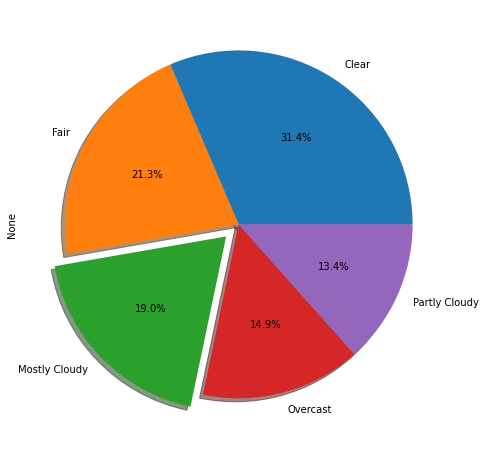

In [32]:
plt.figure(figsize=(14,8))
df.groupby('Weather_Condition') \
        .size() \
        .sort_values(ascending = False) \
        .iloc[:5] \
        .plot.pie(explode=[0,0,0.1,0,0],autopct='%1.1f%%',shadow=True)
plt.ioff()

The accidents count was high during weekdays and low during weekends. This could be attributed to the fact that people commuted to work, school on weekdays.
 


In [33]:
df['Weekday'] = df.index.weekday
yes =df.groupby('Weekday').ID.count() 
fig = px.bar(df, x = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'] , y=yes, color=yes,
             title= ' Acccidents by Weekday ', height=400)
fig.show()

A heat map of correlation matrix that we will use to select features is generated.

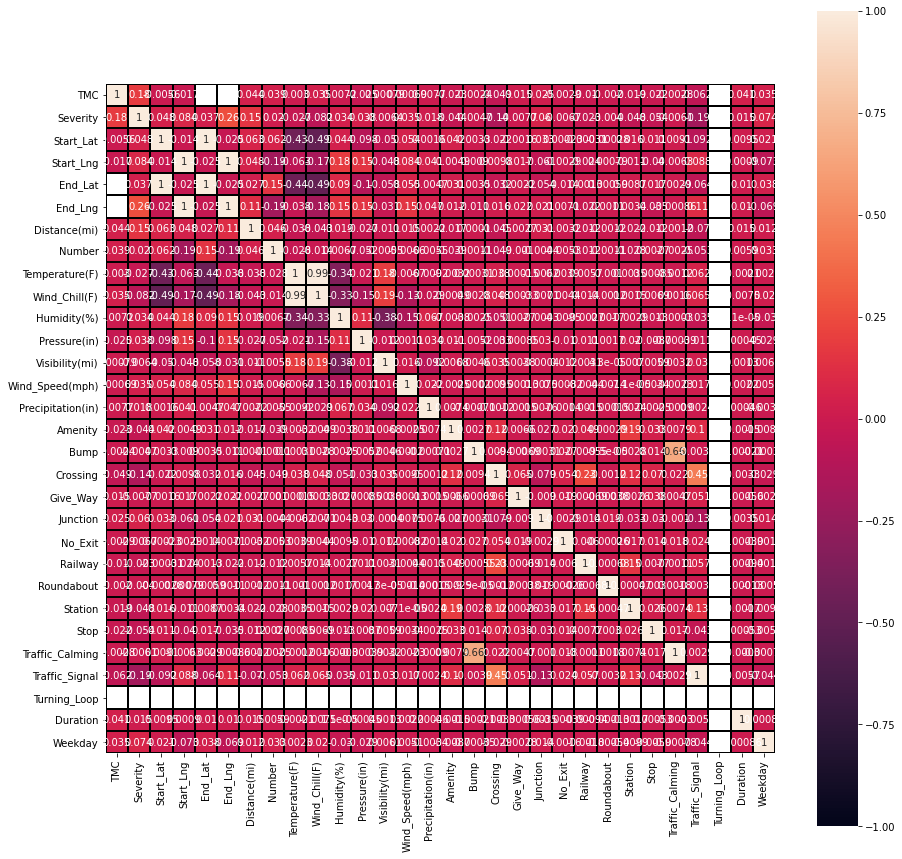

In [34]:
#df = df.dropna('columns') # drop columns with NaN
fig=plt.gcf()
fig.set_size_inches(15,15)
fig=sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

Among the 49 states, California tops the list of states with highest number of traffic accidents, followed by Florida and Texas.

In [35]:
df['State'].value_counts()

CA    816825
TX    329284
FL    258002
SC    173277
NC    165958
NY    160817
PA    106787
IL     99692
VA     96075
MI     95983
GA     93614
OR     90122
MN     81863
AZ     78584
TN     69895
WA     68544
OH     66139
LA     61515
OK     60003
NJ     59059
MD     53593
UT     51685
CO     49731
AL     44625
MA     39044
IN     33746
MO     33643
CT     25901
NE     23970
KY     22553
WI     20120
RI     11753
IA     11475
NV     10643
NH      7984
KS      7939
MS      6585
DE      5739
NM      5523
DC      4820
WV      2381
ME      2243
ID      2044
AR      2012
VT       702
MT       512
WY       508
SD        61
ND        44
Name: State, dtype: int64

In [36]:
df['State'].unique()


array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'TN', 'NC', 'KS', 'LA',
       'OK', 'CO', 'UT', 'AZ', 'MN', 'MS', 'NV', 'ME', 'AR', 'ID', 'VT',
       'NM', 'ND', 'WY', 'SD', 'MT'], dtype=object)

In [37]:

states = ['Ohio','West Virginia', 'California', 'Florida','Georgia',' South Carolina','Nebraska','Iowa','Illinois',
          'Missouri','Wisconsin','Indiana','Michigan', 'New Jersey','New York','Connecticut','Massachusetts','Rhode Island',
          'New Hampshire','Pennsylvania','Kentucky','Maryland','Virginia','District of Columbia','Delaware',
          'Texas','Washington',  'Oregon','Alabama', 'Tennessee','North Carolina','Kansas','Louisiana','Oklahoma',
           'Colorado', 'Utah','Arizona','Minnesota','Missouri','Nevada','Maine', 'Arkansas', 'Idaho','Vermont', 'New Mexico', 
           'North Dakota', 'Wyoming','South Dakota', 'Montana']
              


Values = [66139, 2381, 816825, 258002, 93614, 173277, 23970, 11475, 99692,33643, 20120 
,33746,95983, 59059,  160817,25901,39044,11753,7984, 106787,22553, 53593,
 96075,4820,5739,329284,68544,90122, 44625, 69895,165958,7939,61515,
 60003,49731,51685,78584,81863,6585, 10643,2243, 2012,2044, 702,
5523,44,508, 61, 512 ]

In [38]:
fig = px.choropleth(df,  # Input Pandas DataFrame
                    locations=df['State'].unique(),  # DataFrame column with locations
                    color= Values,  # DataFrame column with color values
                    color_continuous_scale = 'Reds',
                    hover_name= states, # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'State Rankings', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  

In [39]:
df.head()


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration,Weekday
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,314,0
2016-02-08 06:07:59,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,30,0
2016-02-08 06:49:27,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,30,0
2016-02-08 07:23:34,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,30,0
2016-02-08 07:39:07,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,30,0


Find the features with null values. Use the mean to impute them. 


In [40]:
df1 = df
df1.isnull().sum()

ID                             0
Source                         0
TMC                      1034799
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2478818
End_Lng                  2478818
Distance(mi)                   0
Description                    1
Number                   2262864
Street                         0
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Country                        0
Timezone                    3880
Airport_Code                6758
Weather_Timestamp          43323
Temperature(F)             65732
Wind_Chill(F)            1868249
Humidity(%)                69687
Pressure(in)               55882
Visibility(mi)             75856
Wind_Direction             58874
Wind_Speed(mph)           454609
Precipitat

Replace missing values for the following 6 features with thie mean value.

In [41]:
# Calculating Mean
pressure_mean = df1['Pressure(in)'].mean()
temperatue_mean = df1['Temperature(F)'].mean()
weather_mean = df1['Wind_Chill(F)'].mean()
humidity_mean = df1['Humidity(%)'].mean()
windspeed_mean = df1['Wind_Speed(mph)'].mean()
precipitation_mean = df1['Precipitation(in)'].mean()



In [42]:
# Replacing nan values with Mean 
df1['Pressure(in)']=df1['Pressure(in)'].fillna(pressure_mean)
df1['Temperature(F)'] = df1['Temperature(F)'].fillna(temperatue_mean)
df1['Wind_Chill(F)'] = df1['Wind_Chill(F)'].fillna(weather_mean)
df1['Humidity(%)'] = df1['Humidity(%)'].fillna(humidity_mean)
df1['Wind_Speed(mph)'] = df1['Wind_Speed(mph)'].fillna(windspeed_mean)
df1['Precipitation(in)']=df1['Precipitation(in)'].fillna(precipitation_mean)


For features with nan entries, impute them with mode value of the respective feature.

In [43]:
# Replacing nan values with Mode
df1['Visibility(mi)'] = df1['Visibility(mi)'].fillna(df1['Visibility(mi)'].mode()[0])
df1['Wind_Direction'] = df1['Wind_Direction'].fillna(df1['Wind_Direction'].mode()[0])
df1['Weather_Condition'] = df1['Weather_Condition'].fillna(df1['Weather_Condition'].mode()[0])
df1['Sunrise_Sunset'] = df1['Sunrise_Sunset'].fillna(df1['Sunrise_Sunset'].mode()[0])


Feature 'ID' doesn't provide any useful information about accidents themselves. 'TMC', 'Distance(mi)', 'End_Time' (we have start time), 'Duration', 'End_Lat', and 'End_Lng'(we have start location) can be collected only after the accident has already happened and hence cannot be predictors for serious accident prediction. For 'Description', the POI features have already been extracted from it by dataset creators. So these features are dropped. 


In [44]:
#Dropping columns that do not impact the calculations.
dropped_cols = ['ID',"End_Lat", "End_Lng", "Number",'Distance(mi)', 'TMC', 'Country', 
                'Description', 'City', 'County', 'Street', 'Side', 'Zipcode', 'State', 
                'Airport_Code', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
                'Timezone','Weather_Timestamp']
df1 = df1.drop(dropped_cols, axis=1)

Sanity check to see if there are any null values


In [45]:
# dropping Nan values
df1.dropna(axis=0, inplace=True)
df1.isnull().sum()


Source               0
Severity             0
Start_Time           0
End_Time             0
Start_Lat            0
Start_Lng            0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
Sunrise_Sunset       0
Duration             0
Weekday              0
dtype: int64

Features with categorical values is transformed using label encoder.


In [46]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [47]:
df1['Amenity'] = label_encoder.fit_transform(df1['Amenity'])
df1['Bump'] = label_encoder.fit_transform(df1['Bump'])
df1['Crossing'] = label_encoder.fit_transform(df1['Crossing'])
df1['Give_Way'] = label_encoder.fit_transform(df1['Give_Way'])
df1['Junction'] = label_encoder.fit_transform(df1['Junction'])
df1['No_Exit'] = label_encoder.fit_transform(df1['No_Exit'])
df1['Railway'] = label_encoder.fit_transform(df1['Railway'])
df1['Roundabout'] = label_encoder.fit_transform(df1['Roundabout'])
df1['Station'] = label_encoder.fit_transform(df1['Station'])
df1['Stop'] = label_encoder.fit_transform(df1['Stop'])
df1['Traffic_Calming'] = label_encoder.fit_transform(df1['Traffic_Calming'])
df1['Traffic_Signal'] = label_encoder.fit_transform(df1['Traffic_Signal'])
df1['Turning_Loop'] = label_encoder.fit_transform(df1['Turning_Loop'])
df1


,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Duration,Weekday
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,MapQuest,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,36.9,53.557295,91.0,29.68,10.0,Calm,8.219025,0.020000,Light Rain,0,0,0,0,0,0,0,0,0,0,0,0,0,Night,314,0
2016-02-08 06:07:59,MapQuest,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,37.9,53.557295,100.0,29.65,10.0,Calm,8.219025,0.000000,Light Rain,0,0,0,0,0,0,0,0,0,0,0,0,0,Night,30,0
2016-02-08 06:49:27,MapQuest,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,36.0,33.300000,100.0,29.67,10.0,SW,3.500000,0.015983,Overcast,0,0,0,0,0,0,0,0,0,0,0,1,0,Night,30,0
2016-02-08 07:23:34,MapQuest,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,35.1,31.000000,96.0,29.64,9.0,SW,4.600000,0.015983,Mostly Cloudy,0,0,0,0,0,0,0,0,0,0,0,0,0,Night,30,0
2016-02-08 07:39:07,MapQuest,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,36.0,33.300000,89.0,29.65,6.0,SW,3.500000,0.015983,Mostly Cloudy,0,0,0,0,0,0,0,0,0,0,0,1,0,Day,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-23 18:03:25,Bing,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,86.0,86.000000,40.0,28.92,10.0,W,13.000000,0.000000,Fair,0,0,0,0,0,0,0,0,0,0,0,0,0,Day,29,4
2019-08-23 19:11:30,Bing,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,70.0,70.000000,73.0,29.39,10.0,SW,6.000000,0.000000,Fair,0,0,0,0,0,0,0,0,0,0,0,0,0,Day,27,4
2019-08-23 19:00:21,Bing,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,73.0,73.000000,64.0,29.74,10.0,SSW,10.000000,0.000000,Partly Cloudy,0,0,0,0,1,0,0,0,0,0,0,0,0,Day,28,4


In [48]:
df1['Sunrise_Sunset'] = label_encoder.fit_transform(df1['Sunrise_Sunset'])
df1['Weather_Condition'] = label_encoder.fit_transform(df1['Weather_Condition'])
df1['Wind_Direction'] = label_encoder.fit_transform(df1['Wind_Direction'])
df1['Weekday'] = label_encoder.fit_transform(df1['Weekday'])
df1.head()

,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Duration,Weekday
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,MapQuest,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,36.9,53.557295,91.0,29.68,10.0,1,8.219025,0.020000,55,0,0,0,0,0,0,0,0,0,0,0,0,0,1,314,0
2016-02-08 06:07:59,MapQuest,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,37.9,53.557295,100.0,29.65,10.0,1,8.219025,0.000000,55,0,0,0,0,0,0,0,0,0,0,0,0,0,1,30,0
2016-02-08 06:49:27,MapQuest,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,36.0,33.300000,100.0,29.67,10.0,16,3.500000,0.015983,78,0,0,0,0,0,0,0,0,0,0,0,1,0,1,30,0
2016-02-08 07:23:34,MapQuest,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,35.1,31.000000,96.0,29.64,9.0,16,4.600000,0.015983,75,0,0,0,0,0,0,0,0,0,0,0,0,0,1,30,0
2016-02-08 07:39:07,MapQuest,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,36.0,33.300000,89.0,29.65,6.0,16,3.500000,0.015983,75,0,0,0,0,0,0,0,0,0,0,0,1,0,0,30,0
